<a href="https://colab.research.google.com/github/raclan/KDDM_2022/blob/main/PastaImageClassifierPoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
!curl -$ https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9127    0  9127    0     0  44960bash: line 1: syntax error near unexpected token `newline'
 bash: line 1: `<!DOCTYPE html>'
     0 --:--:-- --:--:-- --:--:-- 44960


In [ ]:
!pip install torch torchvision   # install pytorch

In [ ]:
#Import Libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import helper

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!/opt/bin/nvidia-smi  #show GPU 

/bin/bash: /opt/bin/nvidia-smi: No such file or directory


In [ ]:
args={}
args['batch_size']=100
args['test_batch_size']=100
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['log_interval']=1

In [ ]:
# build an mlp
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(128*128, 64*64)
        self.fc2 = nn.Linear(64*64, 32*32)
        self.fc3 = nn.Linear(32*32, 256)
        self.fc4 = nn.Linear(256, 128) 
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 7)

    def forward(self, x):
        h0 = x.view(-1,128*128) #input layer
        h1 = F.relu(self.fc1(h0)) # hidden layer 1
        h2 = F.relu(self.fc2(h1)) # hidden layer 2
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        h5 = F.relu(self.fc5(h4))
        h6 = self.fc6(h5) # output layer

        return h6

model = Net()
model.cuda() # put the model on GPU
print(model)

Net(
  (fc1): Linear(in_features=16384, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=7, bias=True)
)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5) #3 in_channels, 32 out_channels, kernel size of 5
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64*29*29, 32*32)
        self.fc2 = nn.Linear(32*32, 64)
        self.fc3 = nn.Linear(64, 5)
       # self.fc4 = nn.Linear(16*16, 64)
       # self.fc5 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 64*29*29)
        #x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
       # x = F.relu(self.fc3(x))
       # x = F.relu(self.fc4(x))
        x = self.fc3(x)
        return x

model = Net()
model.cuda() # put the model on GPU
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=53824, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [ ]:
# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = args['lr'])

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('gdrive/My Drive/Spring 2022/KDDM/Final Project/unique', output='gdrive/My Drive/Spring 2022/KDDM/Final Project/test', seed=9, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 2873 files [01:24, 34.12 files/s]


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
data_transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(128), transforms.ToTensor()])
#data_transform = torch.nn.Sequential(transforms.Resize(255), transforms.CenterCrop(128))


train_datasets = datasets.ImageFolder(root='gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/train', transform=data_transform)
train_dataloaders = torch.utils.data.DataLoader(train_datasets, batch_size=100, shuffle=True, num_workers=2)

test_datasets = datasets.ImageFolder(root='gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/test', transform=data_transform)
test_dataloaders = torch.utils.data.DataLoader(test_datasets, batch_size=100, shuffle=True, num_workers=2)

In [ ]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGBA')

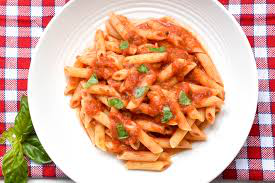

In [ ]:
from PIL import Image

pil_loader('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/train/penne/images90.jpg')

In [ ]:
os.chdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/train/penne')
os.getcwd()

'/content/gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/train/penne'

In [ ]:
os.chdir('../../../../../../../..')
os.getcwd()

'/content'

In [ ]:
#make new folders containing images converted to RGBA
import os

traintest = ['train', 'test']
pastas = ['rigatoni', 'cappelletti', 'farfalle', 'tagliatelle']

for pasta in pastas:
  for tt in traintest:
    for image in os.listdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/' + tt + '/' + pasta):
      im = Image.open('gdrive/My Drive/Spring 2022/KDDM/Final Project/test/' + tt + '/' + pasta + '/' + image)
      if im.mode is not 'RGBA':
        os.chdir('gdrive/My Drive/Spring 2022/KDDM/Final Project/RGBA/' + tt + '/' + pasta)
        im.convert("RGBA").save(f"{image}2.png")
        os.chdir('../../../../../../../..')

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


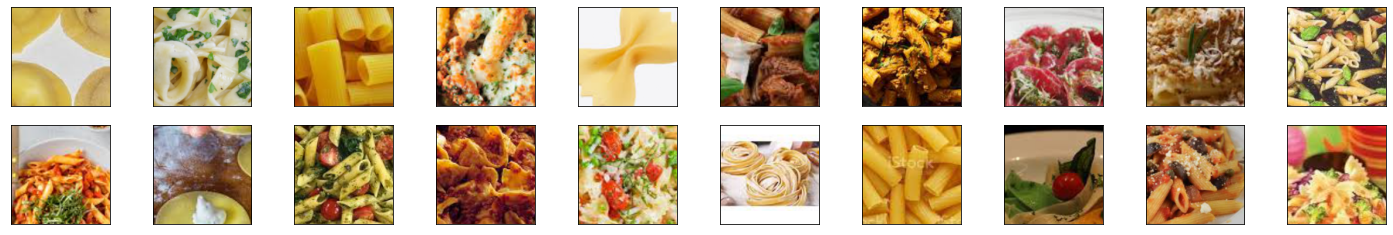

In [ ]:
# helper function to un-normalize and display an image
def imshow(img):
    #img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    

totensor = transforms.ToTensor
dataiter = iter(train_dataloaders)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_dataloaders):
        data, target = data.cuda(), target.cuda()
        
        output = model(data)
        loss = criterion(output, target)
        train_losses.append(loss.cpu().detach().numpy())

        # compute gradients
        optimizer.zero_grad()
        loss.backward()

        #to do a one-step update on our parameter.
        optimizer.step()

        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_dataloaders.dataset),
                100. * batch_idx / len(train_dataloaders), loss.item()))

In [ ]:
def test():
    model.eval() #do not update parameters anymore
    test_loss = 0
    correct = 0
    for data, target in test_dataloaders:
        data, target = data.cuda(), target.cuda()

        output = model(data)
        test_loss += criterion(output, target).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] 
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_dataloaders.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_dataloaders.dataset),
        100. * correct / len(test_dataloaders.dataset)))
    test_acc.append(100. * correct / len(test_dataloaders.dataset))


In [ ]:
train_losses = []
test_acc = []
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

RuntimeError: ignored

In [ ]:
proj_path = 'gdrive/My Drive/Spring 2022/KDDM/Final Project/Pasta'

In [ ]:
folders = ['cappelletti', 'farfalle', 'penne', 'rigatoni', 'tagliatelle']
# folders = ['penne', 'rigatoni']

In [ ]:
p_path = Path(proj_path)

In [ ]:
np.random.seed(9)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=64, num_workers=2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
data.classes

['cappelletti', 'farfalle', 'fusilli', 'penne', 'rigatoni', 'tagliatelle']

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

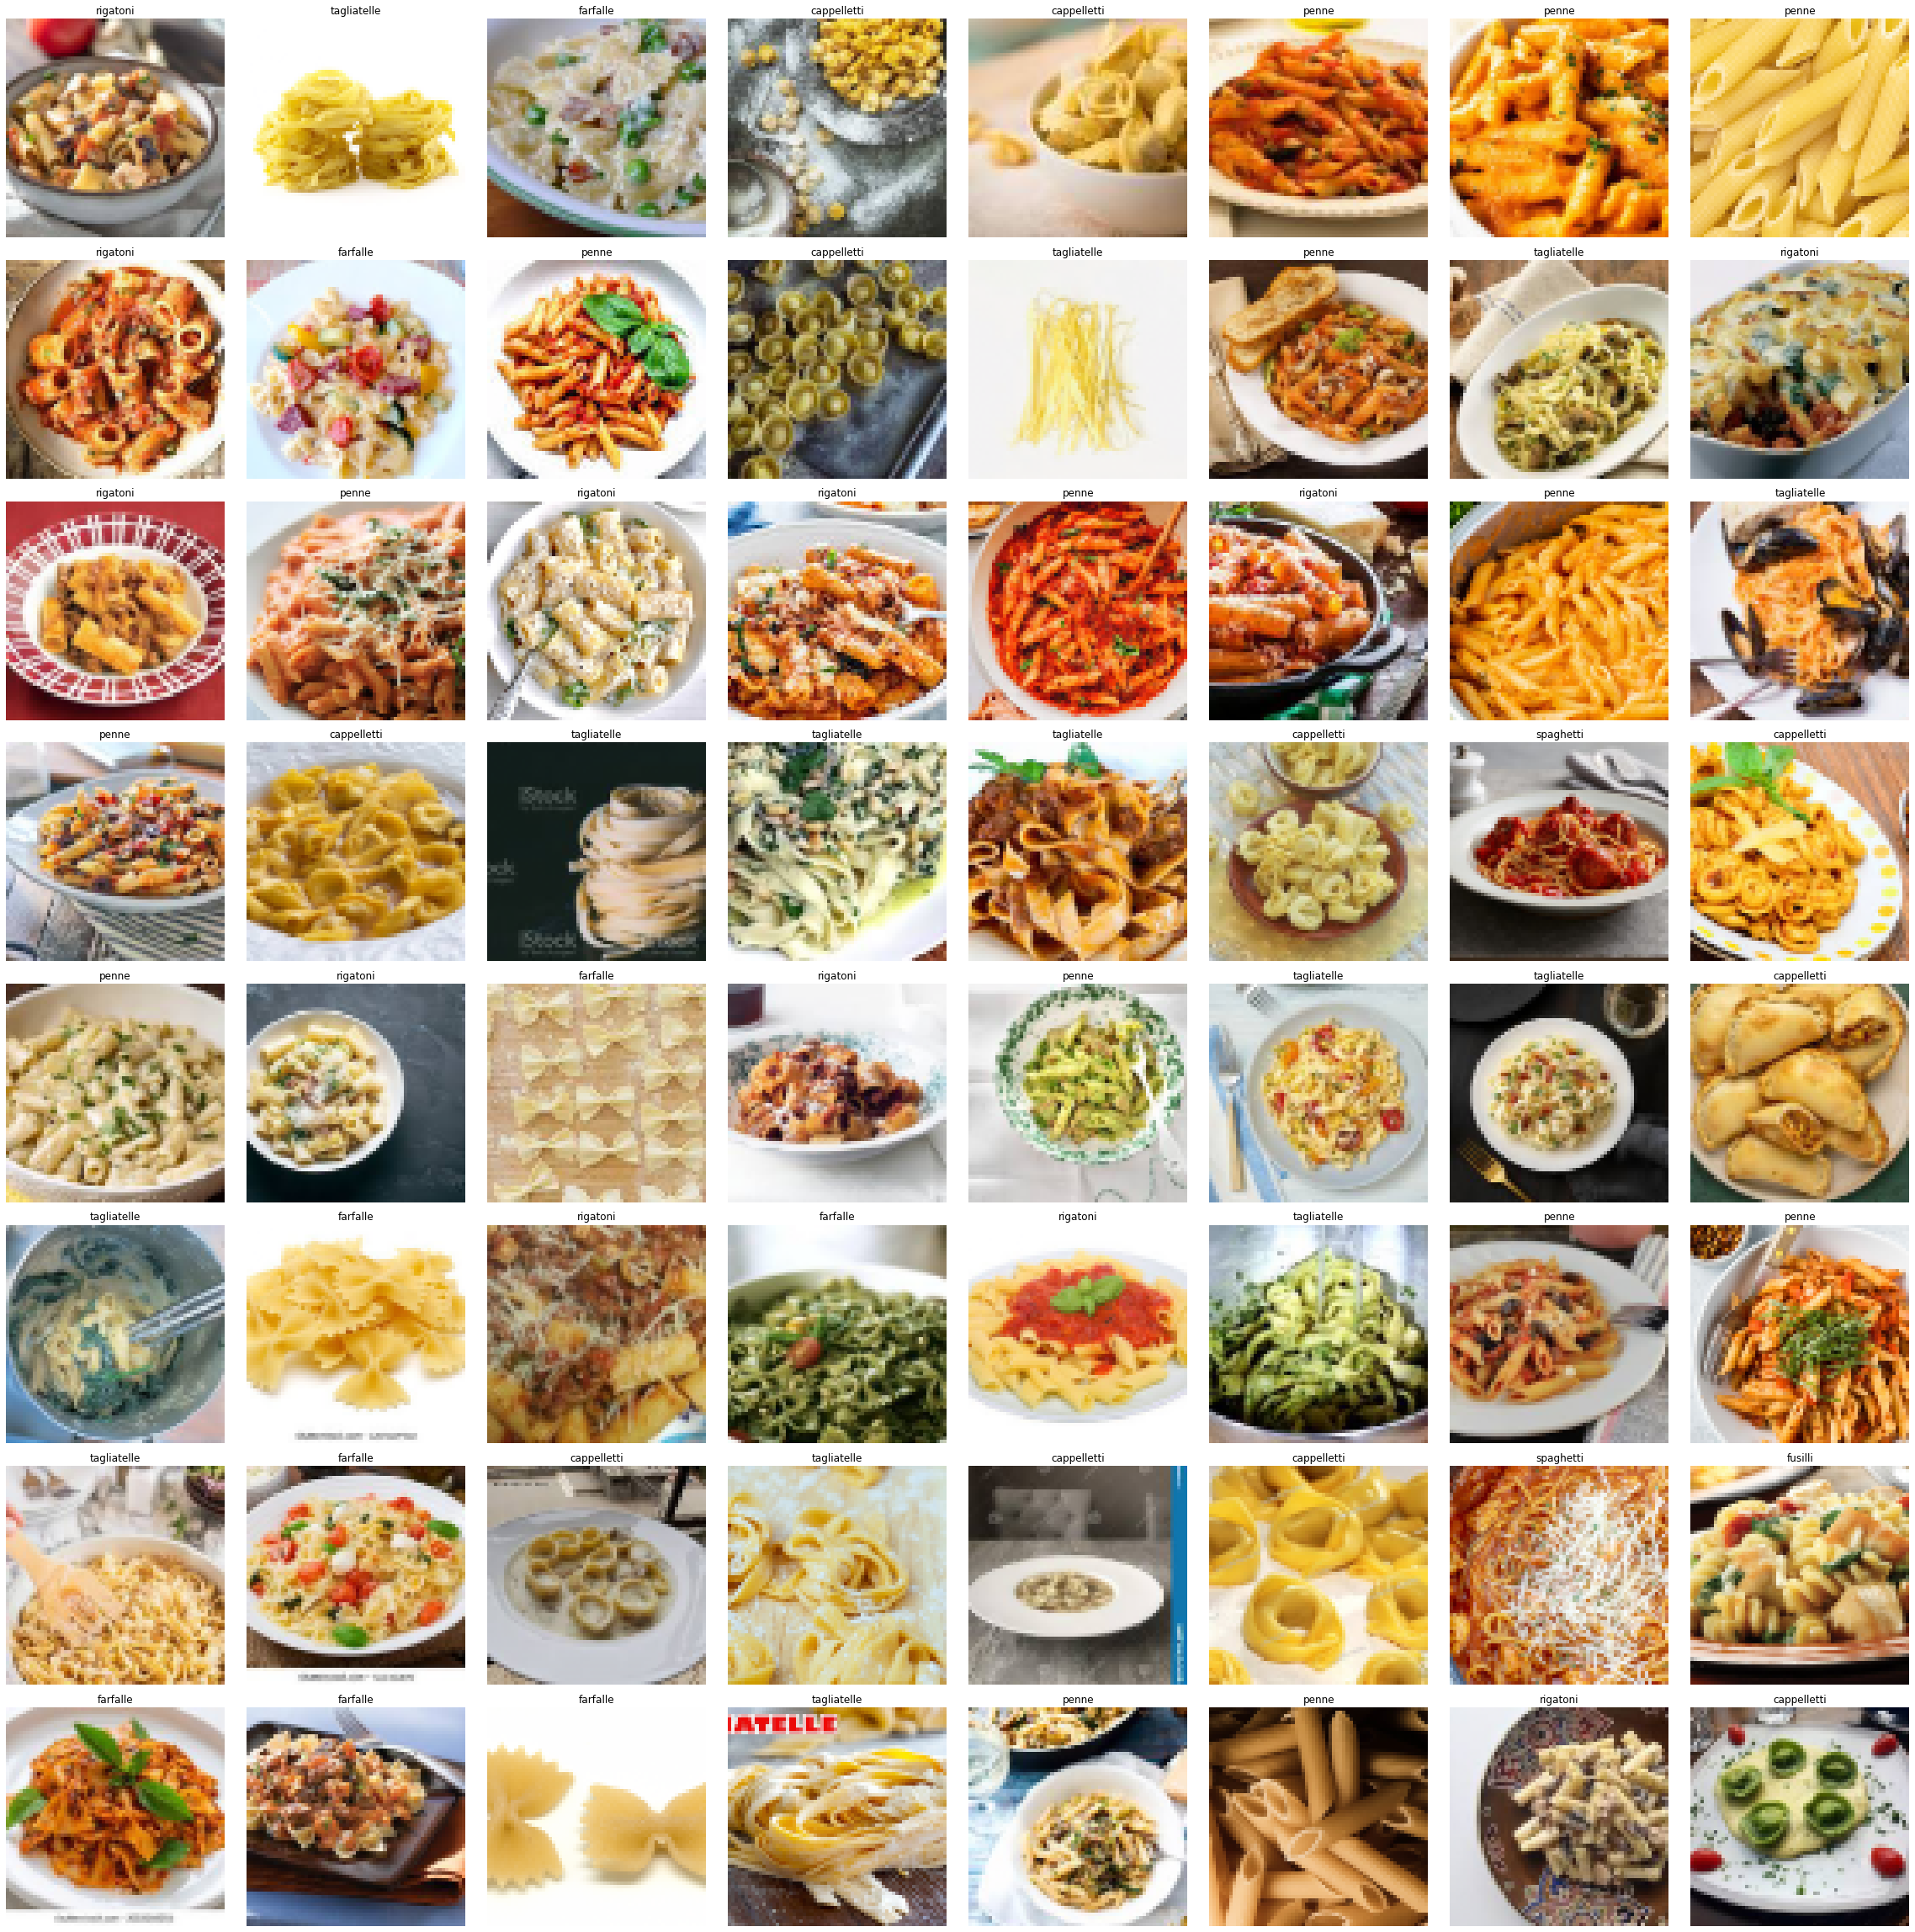

In [ ]:
data.show_batch(rows=10)

In [ ]:
len(data.train_ds), len(data.valid_ds)

(2437, 609)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)  #transfer learning

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

OSError: ignored

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale